In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
sns.set(style ="white", color_codes = True)


In [2]:
#importing dataset
dataset = pd.read_csv('C://Users//narayanreddy//Desktop//python//My Projects//Basic level//Iris dataset//Iris.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 5].values

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Encoding the categorical data
#Encoding for dependent variables
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [6]:
#splitting data into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [7]:
#Fitting lositic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
#Predicting the Test set results
y_pred = classifier.predict(x_test)

In [12]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 13  3]
 [ 0  0  9]]


In [13]:
accuracy_score(y_test, y_pred)


0.92105263157894735

In [14]:
#Complete breakdown of Visualisation for Iris dataset using both seaborn and pandas
#let's first see how many examples we have for each species from the dataset
dataset["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

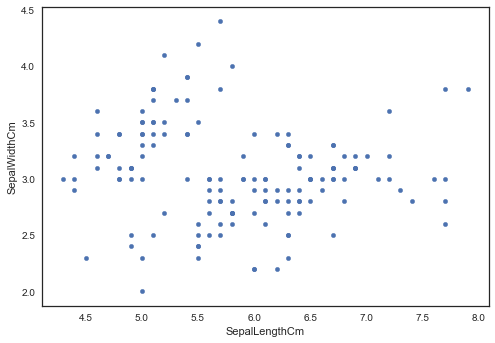

In [15]:
#First let's plot 3 different species using scatterplot for Iris features
dataset.plot(kind = "scatter", x = "SepalLengthCm", y = "SepalWidthCm")

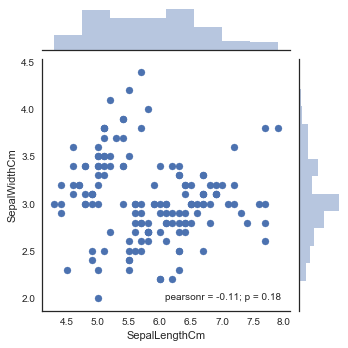

In [16]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset, size=5)

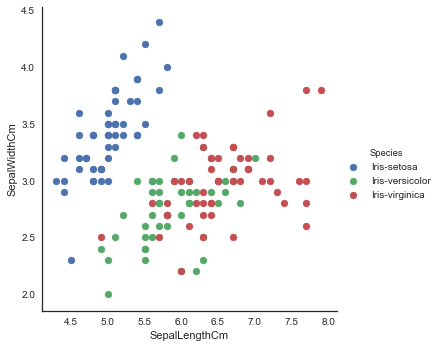

In [18]:
# The information missing in the plots above is what species each plant is
# We can use seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(dataset, hue="Species", size=5) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

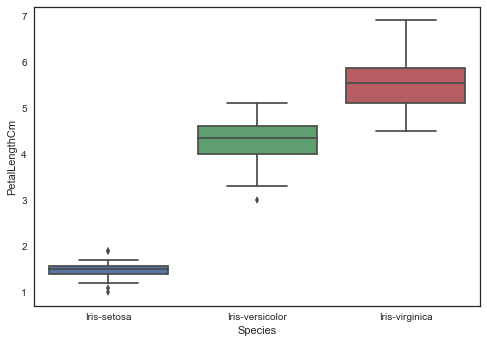

In [21]:
#Let's look at individual feature in seaborn through a boxplot
sns.boxplot(x = "Species", y = "PetalLengthCm", data = dataset)

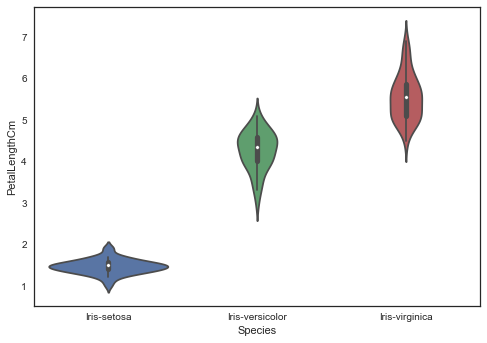

In [23]:
# Plotting Violinplot
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x= "Species", y= "PetalLengthCm", data= dataset, size= 6)

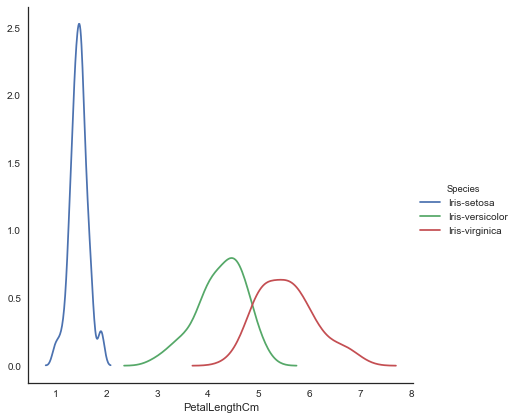

In [24]:
# A final seaborn plot used to look at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(dataset, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DCB5264B00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DCB53D3320>]], dtype=object)

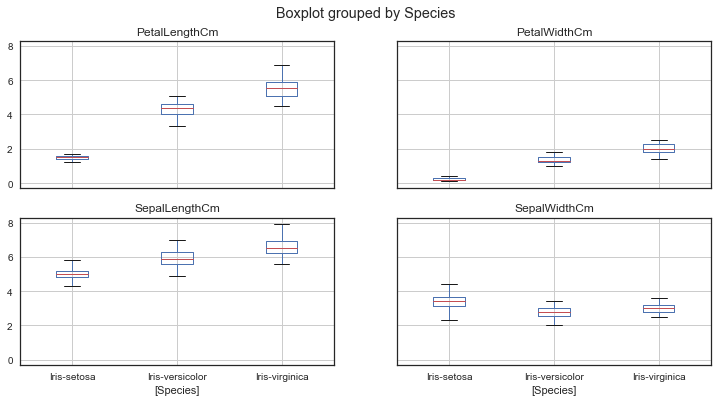

In [25]:
# We've covered seaborn, let's go back to some of the ones we can make with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
dataset.drop("Id", axis=1).boxplot(by="Species", figsize=(12, 6))

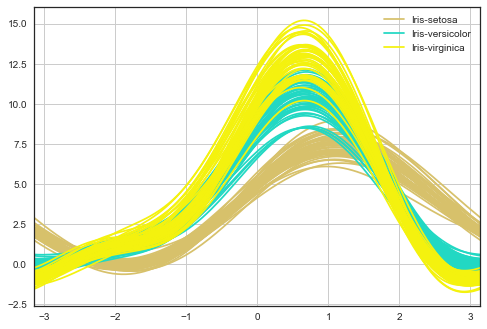

In [26]:
# The coolest/important technique in pandas is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
from pandas.tools.plotting import andrews_curves
andrews_curves(dataset.drop("Id", axis=1), "Species")